----------------------------------
# Project: Twitter US Airline Sentiment 
###     - Using Natural Language Processing  -    By Josh Isaiah
----------------------------------

### Background and Context

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.
That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.
 
Data Description:
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
 
Data Dictionary:
- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone
 
Objective:

*`Build a NLP model for Sentiment Analysis`*

Learning Outcomes:

- Basic understanding of text pre-processing
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model



### Quick Links

- <a href = #link1>Libraries and Dataset Summary</a> 
- <a href = #link2>Exploratory Data Analysis</a>
- <a href = #link3>Data Pre-Processing </a> 
- <a href = #link4>Model Building</a>
- <a href = #link5>Model Summary </a>

# <a id = "link1"></a> Import Libraries and Dataset Summary

In [5]:
# pip install wordcloud

In [295]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization
import seaborn as sns
import wordcloud                                        # Import wordcloud for visualization
from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer  # Vectorization (Convert text data to numbers).
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dagas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dagas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dagas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Load Data

In [16]:
tweets=pd.read_csv('tweets.csv') #import data

In [17]:
data=tweets.copy()

In [18]:
# display the head (first five records)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
# display the tail (last five records)
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


#### Shape and information of Dataset

In [21]:
print('*********************** Data Info ***********************')
print(data.info())

print('\n','*********************** Data Shape (Rows, Columns) ***********************')
print(data.shape)

*********************** Data Info ***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tw

**Observations**
- `Shape` of the dataset is 14,640 rows and 15 columns (Features)
- There are missing values in `negativereason` , `negativereason_confidence`, `airline_sentiment_gold`,`negativereason_gold`,`tweet_coord`,`tweet_location`, and `user_timezone`
- There are 2 floats, 2 int. and 11 object datatypes. We will review these and convert as needed

In [39]:
# view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 

pd.options.display.float_format = '{:.2f}'.format # source: https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,14640.00,14640.00,10522.00,14640.00
mean,569218351767382528.00,0.90,0.64,0.08
std,779111158481836.75,0.16,0.33,0.75
min,567588278875213824.00,0.34,0.00,0.00
25%,568559178101439488.00,0.69,0.36,0.00
50%,569477857923110912.00,1.00,0.67,0.00
75%,569890473289000960.00,1.00,1.00,0.00
max,570310600460525568.00,1.00,1.00,44.00


In [40]:
data.describe(include=['object']).T

,count,unique,top,freq
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14640,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14640,14427,@united thanks,6
tweet_coord,1019,832,"[0.0, 0.0]",164
tweet_created,14640,14247,2015-02-24 09:54:34 -0800,5
tweet_location,9907,3081,"Boston, MA",157


**Observations:**
*  airline_sentiment_confidence ranges from 0.34 to 1.00, which mean value of 0.90
*  Highest number of retweet is 44
*  There are 3 unique entries in airline_sentiment,  with negative being the highest at 9178
*  Total of 6 airlines data were collected, United airline has the highest number of entries
*  Boston, MA has the highest tweets with respect to location
*  Users in Eastern Time zone were more active 
*  Customer Service Issues is the highest negative reason in tweets

# <a id = "link2"></a> Exploratory Data Analysis - EDA

In [46]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [47]:
data.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

#### Checkig for missing values & Unique Values

In [22]:
# looking at which columns have the most missing values and the unique values numbers
print('*********************** Missing Values ***********************')
print(data.isna().sum().sort_values(ascending=False))

print('\n','*********************** Unique Values ***********************')
print(data.nunique().sort_values(ascending=False))

*********************** Missing Values ***********************
negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_created                       0
text                                0
retweet_count                       0
name                                0
airline                             0
airline_sentiment_confidence        0
airline_sentiment                   0
tweet_id                            0
dtype: int64

 *********************** Unique Values ***********************
tweet_id                        14485
text                            14427
tweet_created                   14247
name                             7701
tweet_location                   3081
negativereason_confidence        1410
airline_sentiment_confidence     1023
tweet_coord             

### visualizing missing data using heatmap

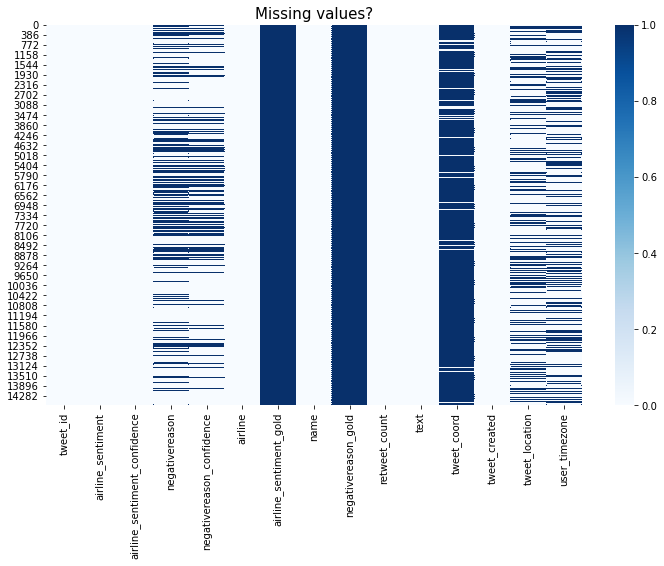

In [50]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

In [27]:
data[data.negativereason_gold.isna()==False]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1286,569851578276048896,negative,1.0000,Late Flight,0.7684,United,negative,MrEschatologist,Late Flight\nFlight Attendant Complaints,0,"@united I'm aware of the flight details, thank...",NaN,2015-02-23 05:29:38 -0800,"Arlington, VA",NaN
2017,569473998519578624,negative,1.0000,Late Flight,0.6048,United,negative,traceyabbywhite,Late Flight\nLost Luggage,0,@united flighted delayed for hours. 10pm arriv...,NaN,2015-02-22 04:29:16 -0800,"Atlantic Highlands, NJ",Eastern Time (US & Canada)
2201,569318505755103232,negative,1.0000,Late Flight,0.6478,United,negative,tarlonious,Late Flight,1,@united it's been over 3 hours...at what point...,NaN,2015-02-21 18:11:23 -0800,NaN,NaN
2383,569235954789015552,negative,0.9286,Customer Service Issue,0.9286,United,negative,screamingbrat,Customer Service Issue,0,@united You shouldn't page o'head that it's be...,NaN,2015-02-21 12:43:22 -0800,"new york, baby",Eastern Time (US & Canada)
3005,568802013196242944,negative,1.0000,Can't Tell,0.6870,United,negative,katieclaytonn,Can't Tell,0,@united couldn't have possibly messed up our t...,NaN,2015-02-20 07:59:02 -0800,NaN,Central Time (US & Canada)
3149,568637541513089024,negative,0.9220,Customer Service Issue,0.4513,United,negative,Mosborne13,Cancelled Flight\nCustomer Service Issue,0,@united rebooked 24 hours after original fligh...,NaN,2015-02-19 21:05:29 -0800,NaN,Central Time (US & Canada)
4206,567778009013178368,negative,1.0000,Cancelled Flight,1.0000,United,negative,realmikesmith,Cancelled Flight,0,@united So what do you offer now that my fligh...,"[26.37852293, -81.78472152]",2015-02-17 12:10:00 -0800,Chicago,Eastern Time (US & Canada)
5183,569273733334077440,negative,1.0000,Customer Service Issue,0.7715,Southwest,negative,nealmo,Customer Service Issue,0,"@SouthwestAir also, gave up after 1 hr 32 min...",NaN,2015-02-21 15:13:29 -0800,NaN,Central Time (US & Canada)
5341,569179898532761600,negative,1.0000,Customer Service Issue,0.9256,Southwest,negative,HDTeem,Customer Service Issue,0,@SouthwestAir I've been on hold for over an ho...,NaN,2015-02-21 09:00:37 -0800,"Baton Rouge, LA",Central Time (US & Canada)
5810,568581908075933696,negative,0.9658,Bad Flight,0.6623,Southwest,negative,abyrley,Bad Flight,1,@SouthwestAir please do something about the sp...,NaN,2015-02-19 17:24:25 -0800,"Raleigh, NC",NaN


**Observations:**
* `negativereason_gold` has the highest number of missing values followed by `airline_sentiment_gold`
* 7 total features have missing values greater than 4000 
* Filtering the dataset shows that rows in which `negativereason_gold` does not having missing values, `airline_sentinment_gold` also does not have missing values. Most of the inputs in these entries for the `airline_sentiment_gold` are same as the `airline_sentiment` features. Hence, we can drop both the `negativereason_gold` and `airline_sentiment_gold`.
* `text` and `airline_sentiment` which are the two key features needed to build our model have zero missing values. However, we will perform EDA on the others as well

### plot for Social Dielemma Sentiment Labels

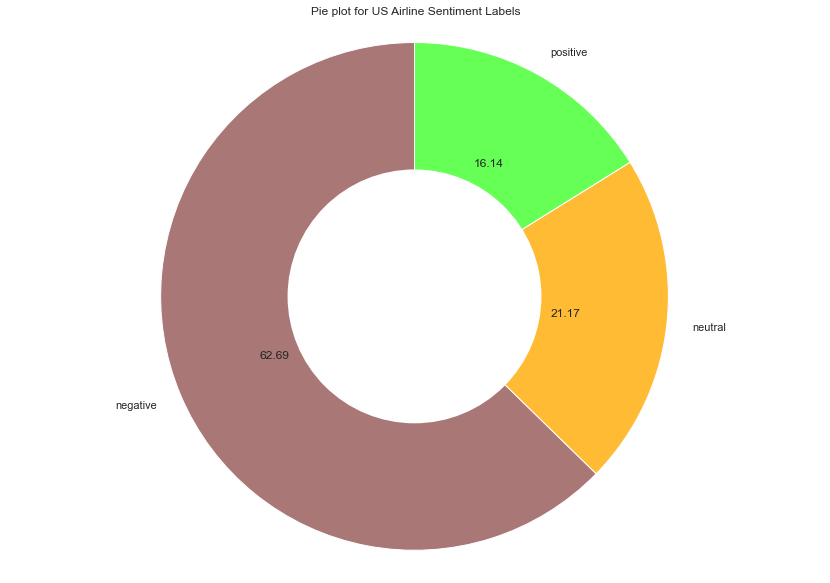

In [77]:
#Using matplotlib
colors = ['#aa7777', '#ffbb33', '#66ff55']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data.airline_sentiment.value_counts(), labels=data.airline_sentiment.value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for US Airline Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

* **Most of the tweets are negative in nature** (62.69%), which indicates customers are not satified with the airlines, followed by 21.17% neutral and 16.14% positive tweets.

In [119]:
# function to create labeled barplots
def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Distribution of all tweets among each airline

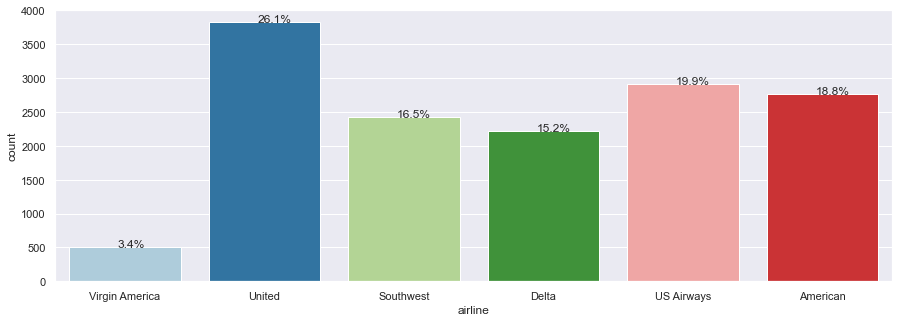

In [120]:
#Visualize the airlines by number of tweets
perc_on_bar('airline')

* United Airline has the highest customer/user related tweets followed by US Airways.
* Virgin America has the least

### Distribution of sentiments across all tweets

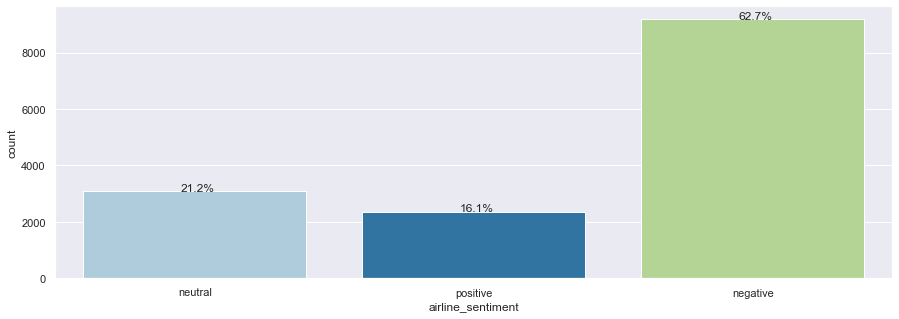

In [84]:
#Visualize the sentiments number of tweets
perc_on_bar('airline_sentiment')

* As seen in the data summary section, negative sentiments is highest at ~63% while positive sentiments is the least at ~16%.

In [93]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['airline_sentiment'],margins=True).sort_values(by='positive',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['airline_sentiment'],normalize='index').sort_values(by='positive',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

# Distribution of Sentiment of tweets for each airline 

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


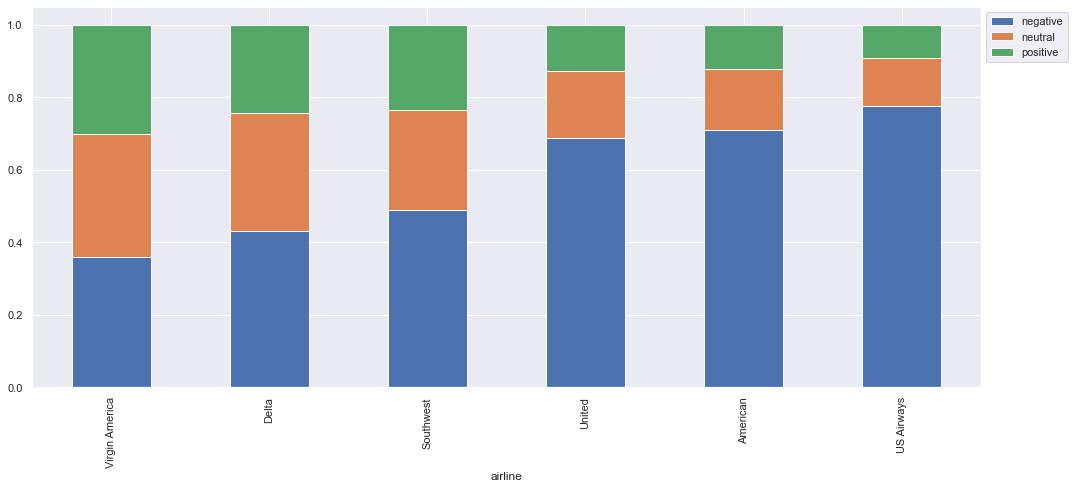

In [95]:
stacked_plot(data.airline)

* Virgin America which we previously analyze to have the least tweet has the highest positive sentiments
* US Airways has the highest negative sentiments. 
* Although United had the highest tweets distribution, it ranked 3rd and not the highst in negative sentiments.

In [158]:
# function to create labeled vertical barplots
def perc_on_bar2(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in the hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,7))
    ax = sns.countplot(y=data[z],data=data,palette='Paired',orient='v')
    ax.set_title('Negative Reason Distribution')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot

### Distribution of all the negative reasons

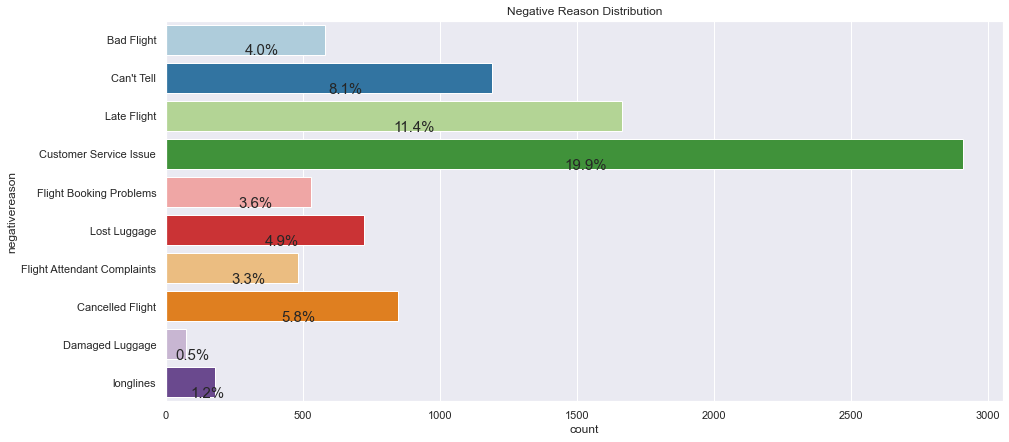

In [159]:
perc_on_bar2('negativereason')

* Customer Service Issue has the highest negative reasons for tweets followed by late flight
* It should also be noted that about 5,400 entries are NaN for the negativereason feature.  Availability of those entries could have maybe make any of the other negativereason be higher

### Word cloud graph 

In [161]:
data.airline_sentiment

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

**Function to plot WordCloud**

In [183]:
from wordcloud import WordCloud,STOPWORDS

In [192]:
# function for Word Cloud Group of Tweets

def Word_Cloud(feature,querry,title):
    customers_tweets=data[data[feature]==querry]
    words = ' '.join(customers_tweets['text'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='yellow',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

In [187]:
# customers_tweets=data[data.airline_sentiment=='negative']
# words = ' '.join(customers_tweets['text'])
# cleaned_word=" ".join([word for word in words.split()
#                          if 'http' not in word
#                          and not word.startswith('@')
#                          and word != 'RT'])
# cleaned_word

In [186]:
# wordcloud = WordCloud(stopwords=STOPWORDS,
#                       background_color='yellow',
#                       width=3000,
#                       height=2500
#                      ).generate(cleaned_word)

### Word Cloud Graph for Negative sentiment 

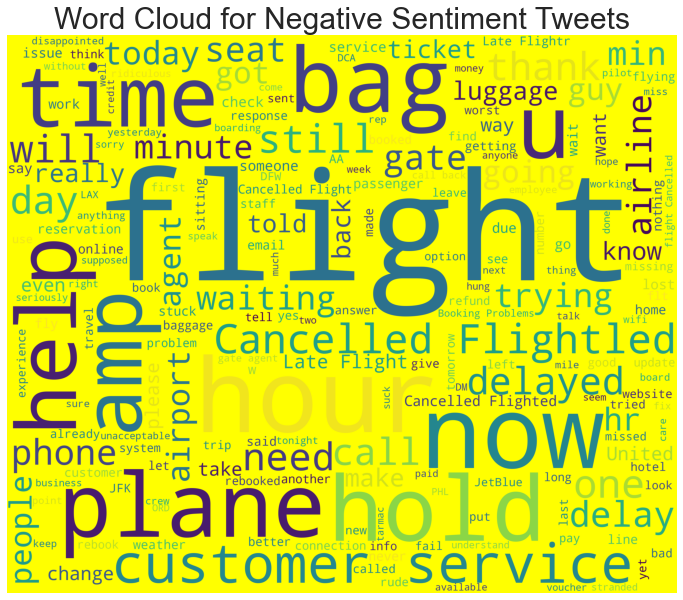

In [193]:
Word_Cloud('airline_sentiment','negative','Word Cloud for Negative Sentiment Tweets')

**Observation**
- We can see that words like `flight`, `now`, `hour`, `time`, `help`, `bag`, `hold`,`Cancelled Flight`, are mostly echoed in the negative sentiments, along with the word `customer service`. These words that will come up in tweets related to anger

### Word Cloud Graph for Positive sentiment 

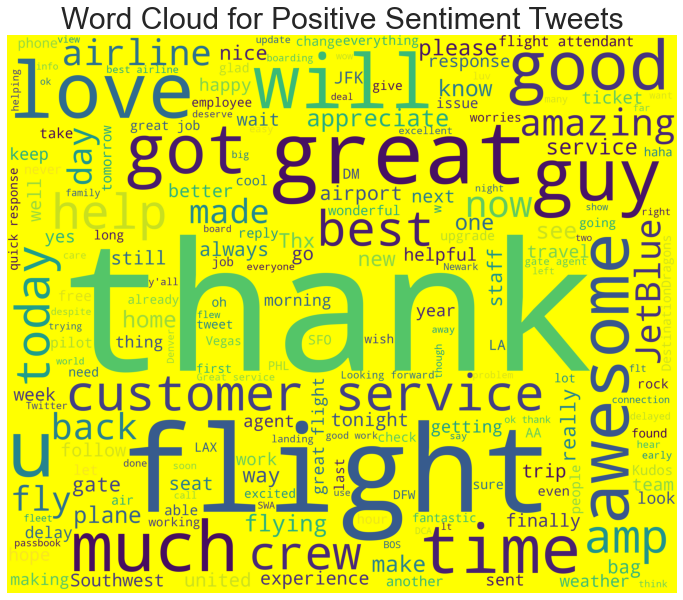

In [194]:
Word_Cloud('airline_sentiment','positive','Word Cloud for Positive Sentiment Tweets')

**Observation**
- We can see that words like `thank`, `good`, `great`, `love`, `awesome`, `better`, `customer service`,`appreciate`, are mostly echoed in the positive sentiments.

# <a id = "link3"></a> Data Pre-processing

In [205]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.00,NaN,nan,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.35,NaN,0.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.68,NaN,nan,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.00,Bad Flight,0.70,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.00,Can't Tell,1.00,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.35,NaN,0.00,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.00,Customer Service Issue,1.00,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.00,NaN,nan,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.00,Customer Service Issue,0.67,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


### Extract text and airline_sentiment features

In [300]:
df=data[['text','airline_sentiment']] # create a new dataframe with the two needed features by dropping all other features

In [301]:
pd.set_option('display.max_colwidth', None)       # Display full dataframe information (Non-turncated Text column.)

df.head()                                        # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [302]:
df.tail()                                      # Check last 5 rows of data

,text,airline_sentiment
14635,@AmericanAir thank you we got on a different flight to Chicago.,positive
14636,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,negative
14637,@AmericanAir Please bring American Airlines to #BlackBerry10,neutral
14638,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",negative
14639,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,neutral


In [303]:
#check shape of new dataframe

df.shape

(14640, 2)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


**Observation:**
- new dataframe has 2 columns (features) and 14640 rows
- no missing values

### Text Pre-processing

- Html tag removal.
- Tokenization.
- Remove the numbers.
- Removal of Special Characters and Punctuations.
- Removal of stopwords
- Conversion to lowercase.
- Lemmatize or stemming.
- Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)


In [305]:
df.head() # view before Text Pre-processing

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [306]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative


### Tokenize

In [307]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df.head()

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


### Lemmatization/Stemming

**We will perform Contractions after removing Stopwords**

In [308]:
stopwords = nltk.corpus.stopwords.words('english')

customlist = ['not', 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))   

In [309]:
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags
def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)

df.head()

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


# <a id = "link4"></a> Model Building

### Vectorization Models

**CountVectorizer Model**

In [330]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
BOW_vectorizer = CountVectorizer(max_features=1200) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = BOW_vectorizer.fit_transform(df.text)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [331]:
train_data_features.shape

(14640, 1200)

In [332]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_features, df.airline_sentiment, test_size=0.3, random_state=42)


In [333]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, train_data_features, df.airline_sentiment, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7367486338797814


**The CountVectorizer with RFC gave an Average score of 0.74**

**Let's Optimize the CountVectorizer model further**

In [334]:
OptiN=np.arange(1,20)
OptiN

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [335]:
# K-Fold Cross - validation .
cv_scores = []
for n in OptiN:
    clf = RandomForestClassifier(n_estimators = n)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

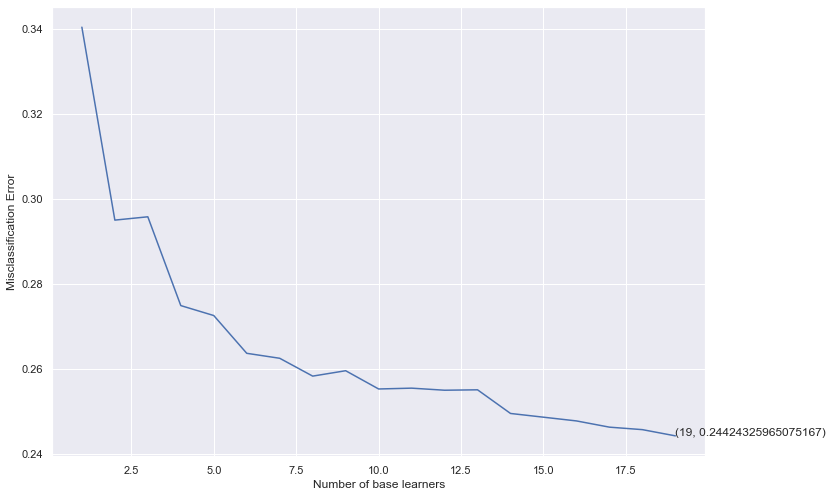

In [337]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = OptiN[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(OptiN, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [338]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7663934426229508

In [340]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2489  229   96]
 [ 367  440   77]
 [ 172   85  437]]
0.7663934426229508


<AxesSubplot:>

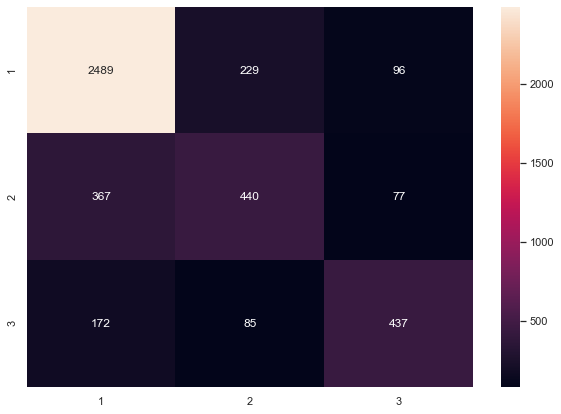

In [345]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.


conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Observation:**
- Model improved slightly, not much. From 73% to 77% after tuning

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

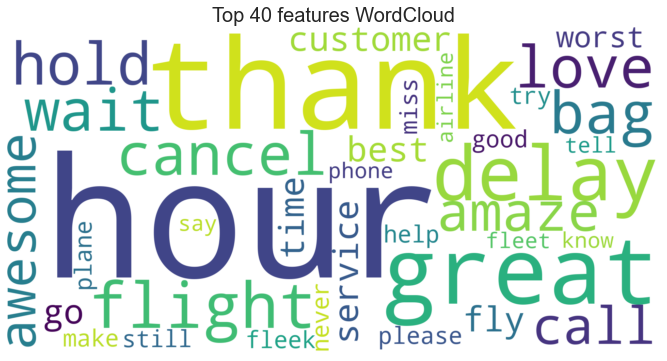

In [347]:
all_features = BOW_vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**Observation:**
- The CountVectorizer using RFC highlighted `thank`, `hour`, `cancel`, `great`, `wait`, etc
- These words cut accross negative, positive and neutral sentiments

### **TF-IDF Model - Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [348]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

TFIDF_vectorizer = TfidfVectorizer(max_features=1200)
train_data_features_tf = TFIDF_vectorizer.fit_transform(df.text)

train_data_features_tf = train_data_features_tf.toarray()

train_data_features_tf.shape

(14640, 1200)

In [349]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_features_tf, df.airline_sentiment, test_size=0.3, random_state=42)


In [350]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, train_data_features_tf,  df.airline_sentiment, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7527322404371585


**The TF-IDF with RFC model gave an Average score of 0.75**

**Let's Optimize the TF-IDF model further**

In [351]:
# K-Fold Cross - validation .
cv_scores = []
for n in OptiN:
    clf = RandomForestClassifier(n_estimators = n)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

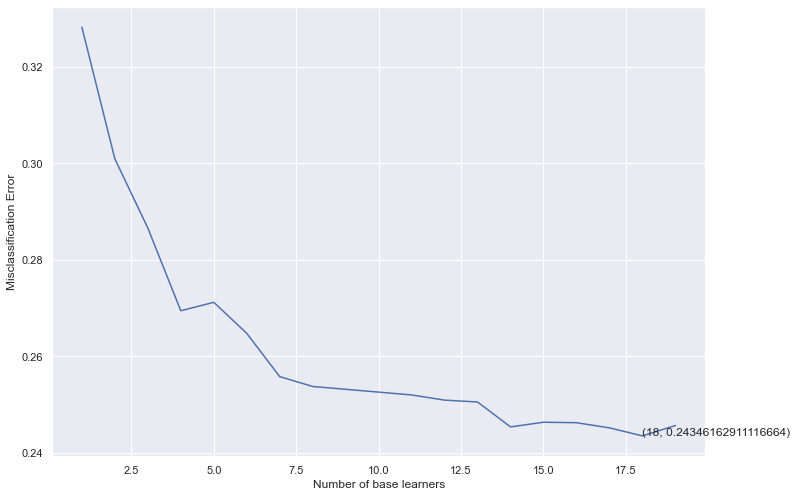

In [352]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = OptiN[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(OptiN, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [353]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7780054644808743

In [356]:
result = clf.predict(X_test)

[[2597  159   58]
 [ 401  414   69]
 [ 215   73  406]]
0.7780054644808743


<AxesSubplot:>

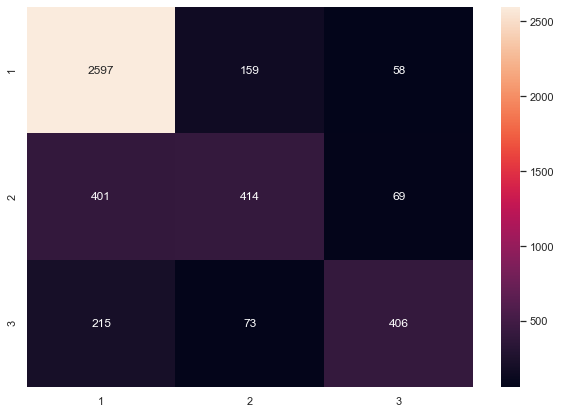

In [357]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.


conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Observation:**
- Model improved slightly, not much. From 75% to 78% after tuning

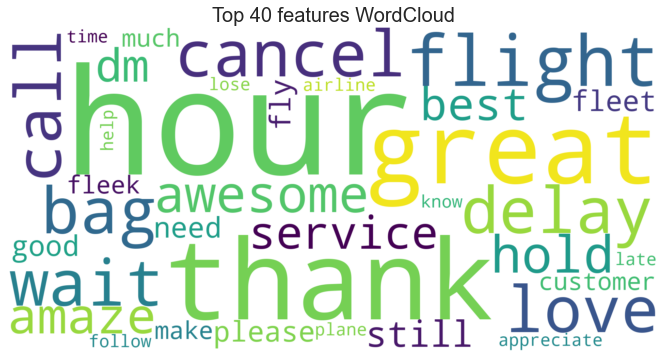

In [358]:
all_features = TFIDF_vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**Observation:**
- The TF-IDF using RFC model highlighted `thank`, `hour`, `cancel`, `great`, `wait`,`delay`, etc
- These words cut accross negative, positive and neutral sentiments

# <a id = "link5"></a> Model Summary

#### Summary
- The key words in tweet during the Text Pre-processing were also picked in the model as the top 40 words
- Both CountVectorizer and TF-IDF (Term Frequency - Inverse Document Frequency) models are very similar with average model score of ~76%
- Both model also highlighted similar top 40 features/words/keywords in the model analysis
- Airlines can use this model to analyze customers sentiments and use it as a measure to evaluate their customer service.
- Customer sentiments from the model will be a great platform for the airlines to use in creating programs for customers
- Additional tuning of the models could lead to higher score, however due to time we will use the ~76% score